In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
df=pd.read_csv("D:\Projects\Machine Learning Projects\Phishing Classifier\Phishing-Classifier-main\Phishing-Classifier-main\Phishing_Legitimate_full.csv")
df.head()

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1     3            1            5          72        0      
1   2     3            1            3         144        0      
2   3     3            1            2          58        0      
3   4     3            1            6          79        1      
4   5     3            0            4          46        0      

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0          0              0          0             0             0       
1          0              0          0             2             0       
2          0              0          0             0             0       
3          0              0          0             0             0       
4          0              0          0             0             0       

   NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0           0                0          0            0            1      
1           2                1          0           41            1      
2           0                0          0            0            1      
3           0                0          0            0            1      
4           0                0          0            2            1      

   RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0        0           0               0                0         
1        0           0               0                0         
2        0           0               0                0         
3        0           0               0                1         
4        1           0               0                1         

   HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0         0               21            44            0       
1         0               17            16          103       
2         0               27            24            0       
3         0               22            50            0       
4         0               10            29            0       

   DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
0          0                  0                  0                0.000        
1          0                  1                  0                0.000        
2          0                  0                  0                0.375        
3          0                  0                  1                1.000        
4          0                  0                  0                1.000        

   PctExtResourceUrls  ExtFavicon  InsecureForms  RelativeFormAction  \
0       0.250000            1            1                 0           
1       0.000000            0            1                 0           
2       1.000000            1            1                 0           
3       0.095238            1            1                 0           
4       1.000000            0            0                 0           

   ExtFormAction  AbnormalFormAction  PctNullSelfRedirectHyperlinks  \
0        0                 0                       0.0                
1        0                 0                       0.0                
2        0                 0                       0.0                
3        0                 0                       0.0                
4        1                 0                       0.0                

   FrequentDomainNameMismatch  FakeLinkInStatusBar  RightClickDisabled  \
0               0                       0                    0           
1               0                       0                    0           
2               0                       0                    0           
3               1                       0                    0           
4               1                       0                    0           

   PopUpWindow  SubmitInfoToEmail  IframeOrFrame  MissingTitle  \
0       0               0                0              0        
1       0               0         

In [32]:
df.shape

(10000, 50)

In [33]:
df.tail()

id    NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
9995   9996     3            1            1         50         0      
9996   9997     2            1            4         59         1      
9997   9998     2            1            4         57         0      
9998   9999     3            1            1         49         0      
9999  10000     3            1            2         52         3      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
9995          0              0          0             0             0       
9996          0              0          0             0             0       
9997          0              0          0             0             0       
9998          0              0          0             0             0       
9999          0              0          0             0             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
9995           2                1          0            9            1      
9996           0                0          0            0            1      
9997           0                0          0            6            1      
9998           1                0          0            3            1      
9999           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
9995        0           0               0                0         
9996        1           0               0                1         
9997        1           0               0                0         
9998        0           0               0                0         
9999        0           0               0                1         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
9995         0               15            10          17        
9996         0               19            33           0        
9997         0               16            34           0        
9998         0               15            13          13        
9999         0               10            35           0        

      DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  \
9995          0                  0                  0           
9996          0                  0                  0           
9997          0                  0                  0           
9998          0                  0                  0           
9999          0                  0                  0           

      PctExtHyperlinks  PctExtResourceUrls  ExtFavicon  InsecureForms  \
9995      0.096774           0.757143            1            1         
9996      0.161290           0.275862            0            1         
9997      0.070423           0.500000            0            1         
9998      0.166667           0.428571            0            1         
9999      0.089623           0.042553            0            1         

      RelativeFormAction  ExtFormAction  AbnormalFormAction  \
9995           0                0                 0           
9996           0                0                 0           
9997           0                0                 0           
9998           1                0                 0           
9999           0                0                 0           

      PctNullSelfRedirectHyperlinks  FrequentDomainNameMismatch  \
9995            0.000000                          0               
9996            0.129032                          0               
9997            0.056338                          0               
9998            0.000000                          0               
9999            0.004717                          0               

      FakeLinkInStatusBar  RightClickDisabled  PopUpWindow  SubmitInfoToEmail  \
9995           0                    0               0               0           
9996           0                    0               0               0     

In [34]:
# Dropping the id column
df.drop('id', axis=1, inplace=True)

In [35]:
df.head()

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  NumDashInHostname  \
0     3            1            5          72        0             0           
1     3            1            3         144        0             0           
2     3            1            2          58        0             0           
3     3            1            6          79        1             0           
4     3            0            4          46        0             0           

   AtSymbol  TildeSymbol  NumUnderscore  NumPercent  NumQueryComponents  \
0      0          0             0             0               0           
1      0          0             2             0               2           
2      0          0             0             0               0           
3      0          0             0             0               0           
4      0          0             0             0               0           

   NumAmpersand  NumHash  NumNumericChars  NoHttps  RandomString  IpAddress  \
0        0          0            0            1           0           0       
1        1          0           41            1           0           0       
2        0          0            0            1           0           0       
3        0          0            0            1           0           0       
4        0          0            2            1           1           0       

   DomainInSubdomains  DomainInPaths  HttpsInHostname  HostnameLength  \
0           0                0               0               21         
1           0                0               0               17         
2           0                0               0               27         
3           0                1               0               22         
4           0                1               0               10         

   PathLength  QueryLength  DoubleSlashInPath  NumSensitiveWords  \
0      44            0              0                  0           
1      16          103              0                  1           
2      24            0              0                  0           
3      50            0              0                  0           
4      29            0              0                  0           

   EmbeddedBrandName  PctExtHyperlinks  PctExtResourceUrls  ExtFavicon  \
0          0                0.000            0.250000            1       
1          0                0.000            0.000000            0       
2          0                0.375            1.000000            1       
3          1                1.000            0.095238            1       
4          0                1.000            1.000000            0       

   InsecureForms  RelativeFormAction  ExtFormAction  AbnormalFormAction  \
0        1                 0                0                 0           
1        1                 0                0                 0           
2        1                 0                0                 0           
3        1                 0                0                 0           
4        0                 0                1                 0           

   PctNullSelfRedirectHyperlinks  FrequentDomainNameMismatch  \
0               0.0                            0               
1               0.0                            0               
2               0.0                            0               
3               0.0                            1               
4               0.0                            1               

   FakeLinkInStatusBar  RightClickDisabled  PopUpWindow  SubmitInfoToEmail  \
0           0                    0               0               0           
1           0                    0               0               0           
2           0                    0               0               0           
3           0                    0               0               1           
4           0                    0               0               0           

sweetviz will focus on providing a focused data exploration i.e. it's an exploratory data analysis and it is used for comparing the datasets and drawing inferences from that. You can generate the report in the form of html files.

In [7]:
!pip install sweetviz

In [8]:
import sweetviz as sv
sweet_report=sv.analyze(df)
sweet_report.show_html('sweet_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


autoviz is an automated framework which helps in visualization, relationship, impactful features, plot creations. It will create pairwise plot, heatmap, histogram, violant plot, etc

In [9]:
!pip install autoviz

In [10]:
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

Imported v0.1.804. After importing autoviz, you must run '%matplotlib inline' to display charts inline.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [11]:
df_auto=AV.AutoViz("D:\Projects\Machine Learning Projects\Phishing Classifier\Phishing-Classifier-main\Phishing-Classifier-main\Phishing_Legitimate_full.csv", depVar='CLASS_LABEL')
df_auto

Shape of your Data Set loaded: (10000, 50)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  21
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  23
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    49 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['id', 'HttpsInHostname']

################ Binary_Classification

Total Number of Scatter Plots = 6
All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks  IpAddress  \
0                      1                      0.000000          0       
1                      1                      0.000000          0       
2                      0                      0.375000          0       
3                     -1                      1.000000          0       
4                     -1                      1.000000          0       
...                                  ...               ...        ...   
9995                   1                      0.096774          0       
9996                   1                      0.161290          0       
9997                   1                      0.070423          0       
9998                   1                      0.166667          0       
9999                   1                      0.089623          0       

      FrequentDomainNameMismatch  PctNullSelfRedirectHyperlinks  \
0                  0                        0.000000              
1                  0                        0.000000              
2                  0                        0.000000              
3                  1                        0.000000              
4                  1                        0.000000              
...                          ...                            ...   
9995               0                        0.000000              
9996               0                        0.129032              
9997               0                        0.056338              
9998               0                        0.000000              
9999               0                        0.004717              

      InsecureForms  PctExtResourceUrls  SubmitInfoToEmail  NumDash  NoHttps  \
0           1             0.250000               0             0        1      
1           1             0.000000               0             0        1      
2           1             1.000000               0             0        1      
3           1             0.095238               1             1        1      
4           0             1.000000               0             0        1      
...             ...                 ...                ...      ...      ...   
9995        1             0.757143               0             0        1      
9996        1             0.275862               0             1        1      
9997        1             0.500000               0             0        1      
9998        1             0.428571               0             0        1      
9999        1             0.042553               0             3        1      

      ExtMetaScriptLinkRT  NumSensitiveWords  IframeOrFrame  \
0             -1                   0                0         
1              1                   1                0         
2             -1                   0                0         
3              1                   0                0         
4             -1                   0                1         
...                   ...                ...            ...   
9995           0                   0                0         
9996           0                   0                1         
9997           0                   0                0         
9998           0                   0                1         
9999           1                   0                0         

      PctExtResourceUrlsRT  ExtFavicon  MissingTitle  AbnormalExtFormActionR  \
0               1                1            0                  1             
1               1                0            0                  1             
2              -1                1            0                  1             
3               1                1            0                  1             
4              -1                0            0                  0             
...                    ...         ...           ...                     ...   
9995           -1                1            

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

In [36]:
# Converting from 64 bits to 32 bits so that it consume less memory and make our code faster
float_cols=df.select_dtypes('float64').columns
for i in float_cols:
    df[i]=df[i].astype('float32')
    
int_cols=df.select_dtypes('int64').columns
for i in int_cols:
    df[i]=df[i].astype('int32')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int32  
 1   SubdomainLevel                      10000 non-null  int32  
 2   PathLevel                           10000 non-null  int32  
 3   UrlLength                           10000 non-null  int32  
 4   NumDash                             10000 non-null  int32  
 5   NumDashInHostname                   10000 non-null  int32  
 6   AtSymbol                            10000 non-null  int32  
 7   TildeSymbol                         10000 non-null  int32  
 8   NumUnderscore                       10000 non-null  int32  
 9   NumPercent                          10000 non-null  int32  
 10  NumQueryComponents                  10000 non-null  int32  
 11  NumAmpersand                        10000 

In [38]:
# Renaming our target columns
df.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

In [39]:
df.sample(10)

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
6961     2            0            2          63        1      
353      2            0            3          34        0      
9441     3            1            2          55        1      
9204     2            1            1          46        0      
4493     2            0            2          39        0      
4357     3            1            5          90        3      
931      4            0            5         107        1      
3746     2            1            2          28        0      
8874     1            0            2          45        2      
2458     2            0            2          38        0      

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
6961          0              0          0             0             0       
353           0              0          0             0             0       
9441          0              0          0             0             0       
9204          0              0          0             0             0       
4493          0              0          0             0             0       
4357          1              0          0             1             0       
931           0              0          0             3             0       
3746          0              0          0             0             0       
8874          1              0          0             0             0       
2458          0              0          0             0             0       

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
6961           0                0          0           16            1      
353            0                0          0            0            1      
9441           1                0          0            4            1      
9204           1                0          0            7            1      
4493           0                0          0            0            1      
4357           1                0          0            0            1      
931            1                0          0           11            1      
3746           0                0          0            0            1      
8874           1                0          0            0            1      
2458           0                0          0            0            1      

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
6961        1           0               0                0         
353         0           0               0                0         
9441        0           0               0                1         
9204        0           0               0                0         
4493        0           0               0                0         
4357        0           0               0                1         
931         1           1               0                1         
3746        0           0               0                0         
8874        0           0               0                0         
2458        0           0               0                0         

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
6961         0               20            36           0        
353          0                7            20           0        
9441         0               17            19          11        
9204         0               12             9          17        
4493         0               16            16           0        
4357         0               21            54           7        
931          0               13            46          40        
3746         0               15             6           0        
8874         0               13            13          11        
2458         0               17            14           0        

      DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  \
6961          0                  0                  0           

#### Label 1 means Phishing Mail and Label 0 means Not a Phishing Mail.

In [40]:
df.describe()

NumDots    SubdomainLevel    PathLevel     UrlLength      NumDash    \
count  10000.000000   10000.000000   10000.000000  10000.000000  10000.000000   
mean       2.445100       0.586800       3.300300     70.264100      1.818000   
std        1.346836       0.751214       1.863241     33.369877      3.106258   
min        1.000000       0.000000       0.000000     12.000000      0.000000   
25%        2.000000       0.000000       2.000000     48.000000      0.000000   
50%        2.000000       1.000000       3.000000     62.000000      0.000000   
75%        3.000000       1.000000       4.000000     84.000000      2.000000   
max       21.000000      14.000000      18.000000    253.000000     55.000000   

       NumDashInHostname    AtSymbol     TildeSymbol  NumUnderscore  \
count    10000.000000     10000.000000  10000.000000   10000.00000    
mean         0.138900         0.000300      0.013100       0.32320    
std          0.545744         0.017319      0.113709       1.11466    
min          0.000000         0.000000      0.000000       0.00000    
25%          0.000000         0.000000      0.000000       0.00000    
50%          0.000000         0.000000      0.000000       0.00000    
75%          0.000000         0.000000      0.000000       0.00000    
max          9.000000         1.000000      1.000000      18.00000    

        NumPercent   NumQueryComponents  NumAmpersand     NumHash    \
count  10000.000000     10000.000000     10000.000000  10000.000000   
mean       0.073800         0.458600         0.277200      0.002300   
std        0.622248         1.344793         1.117356      0.047906   
min        0.000000         0.000000         0.000000      0.000000   
25%        0.000000         0.000000         0.000000      0.000000   
50%        0.000000         0.000000         0.000000      0.000000   
75%        0.000000         0.000000         0.000000      0.000000   
max       19.000000        23.000000        22.000000      1.000000   

       NumNumericChars     NoHttps    RandomString    IpAddress   \
count   10000.000000    10000.000000   10000.00000  10000.000000   
mean        5.810300        0.988800       0.52520      0.017200   
std         9.617877        0.105241       0.49939      0.130023   
min         0.000000        0.000000       0.00000      0.000000   
25%         0.000000        1.000000       0.00000      0.000000   
50%         2.000000        1.000000       1.00000      0.000000   
75%         8.000000        1.000000       1.00000      0.000000   
max       111.000000        1.000000       1.00000      1.000000   

       DomainInSubdomains  DomainInPaths  HttpsInHostname  HostnameLength  \
count     10000.000000     10000.000000       10000.0        10000.00000    
mean          0.022200         0.428900           0.0           18.82430    
std           0.147341         0.494944           0.0            8.11654    
min           0.000000         0.000000           0.0            4.00000    
25%           0.000000         0.000000           0.0           14.00000    
50%           0.000000         0.000000           0.0           18.00000    
75%           0.000000         1.000000           0.0           22.00000    
max           1.000000         1.000000           0.0          137.00000    

        PathLength    QueryLength  DoubleSlashInPath  NumSensitiveWords  \
count  10000.000000  10000.000000    10000.000000       10000.000000      
mean      35.564900      8.606500        0.000900           0.109300      
std       24.588502     24.313053        0.029988           0.368737      
min        0.000000      0.000000        0.000000           0.000000      
25%       18.000000      0.000000        0.000000           0.000000      
50%       30.000000      0.000000        0.000000           0.000000      
75%       48.000000      0.000000        0.000000           0.000000      
max      161.000000    188.000000        1.000000           3.000000      

       EmbeddedBr

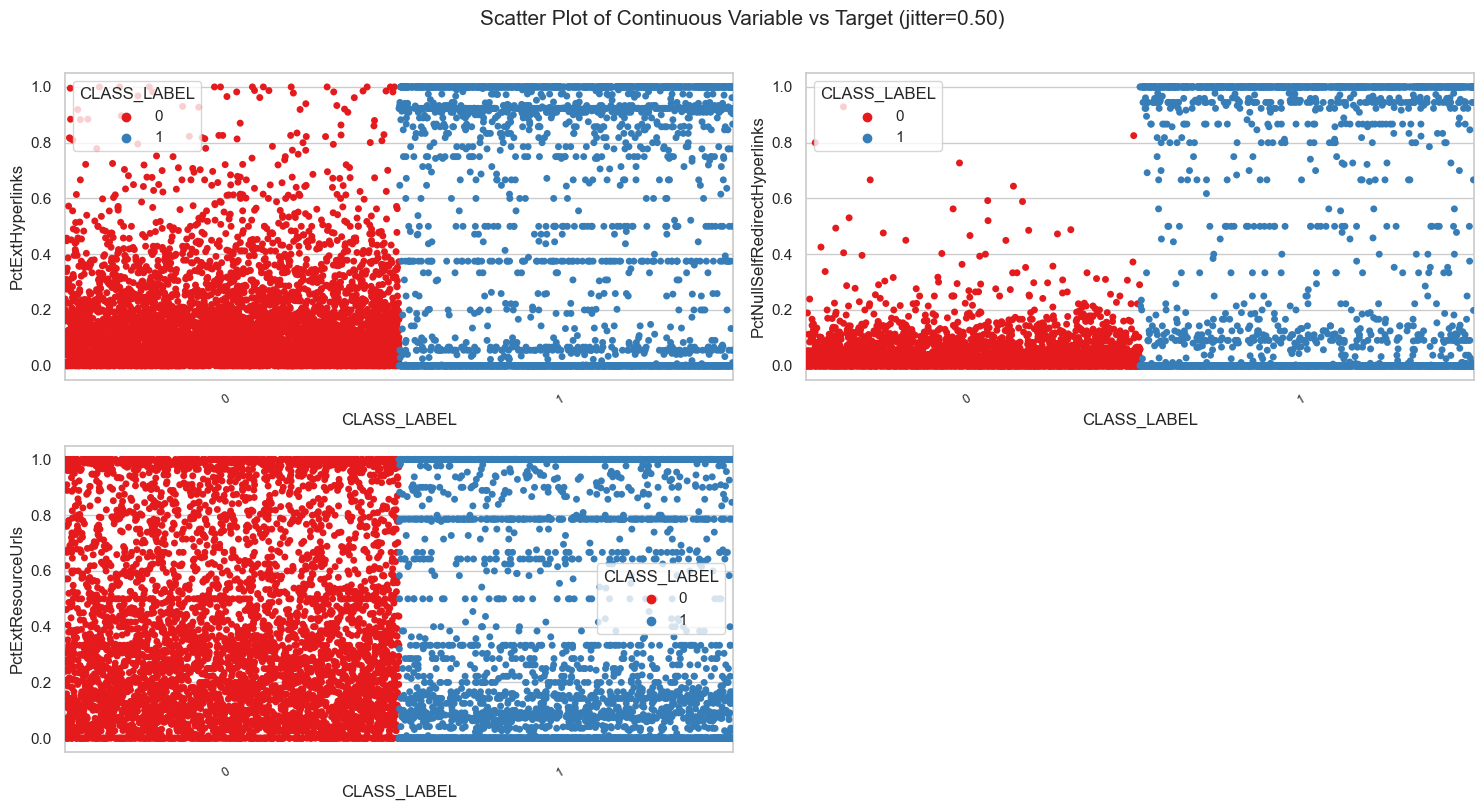

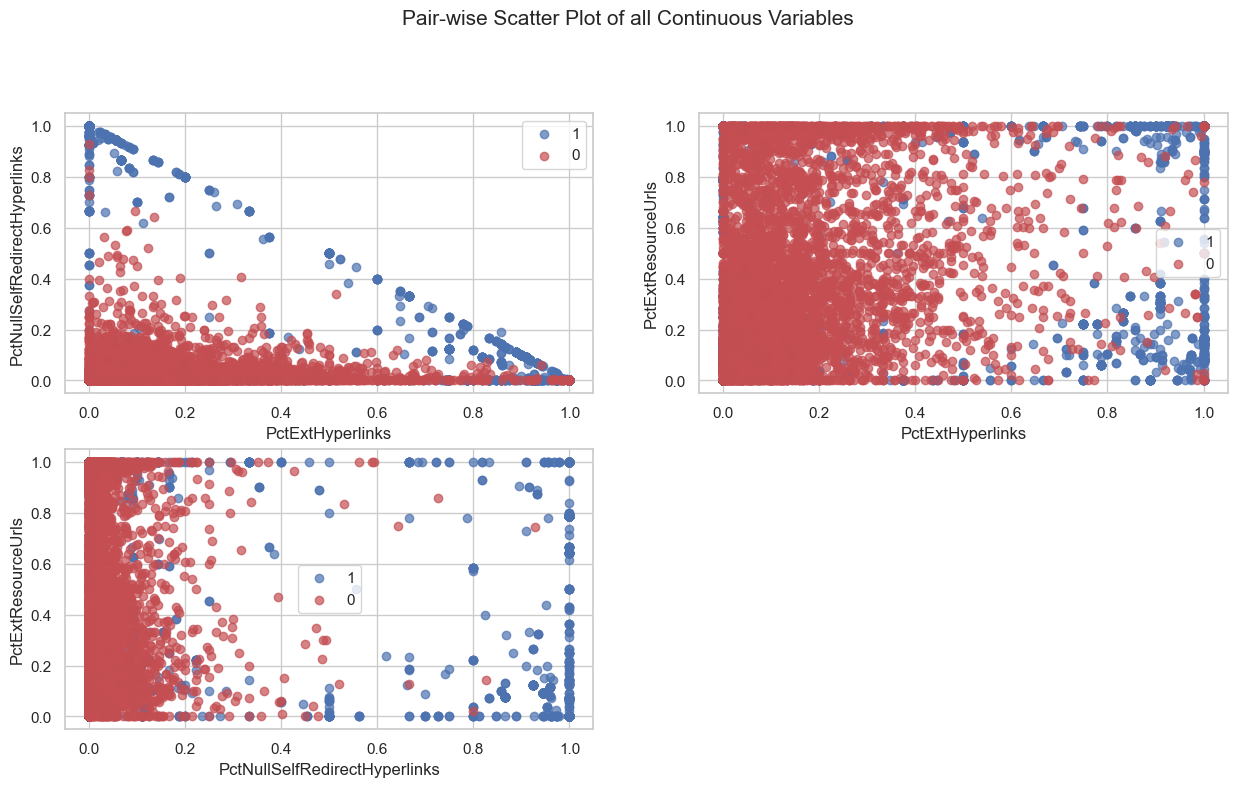

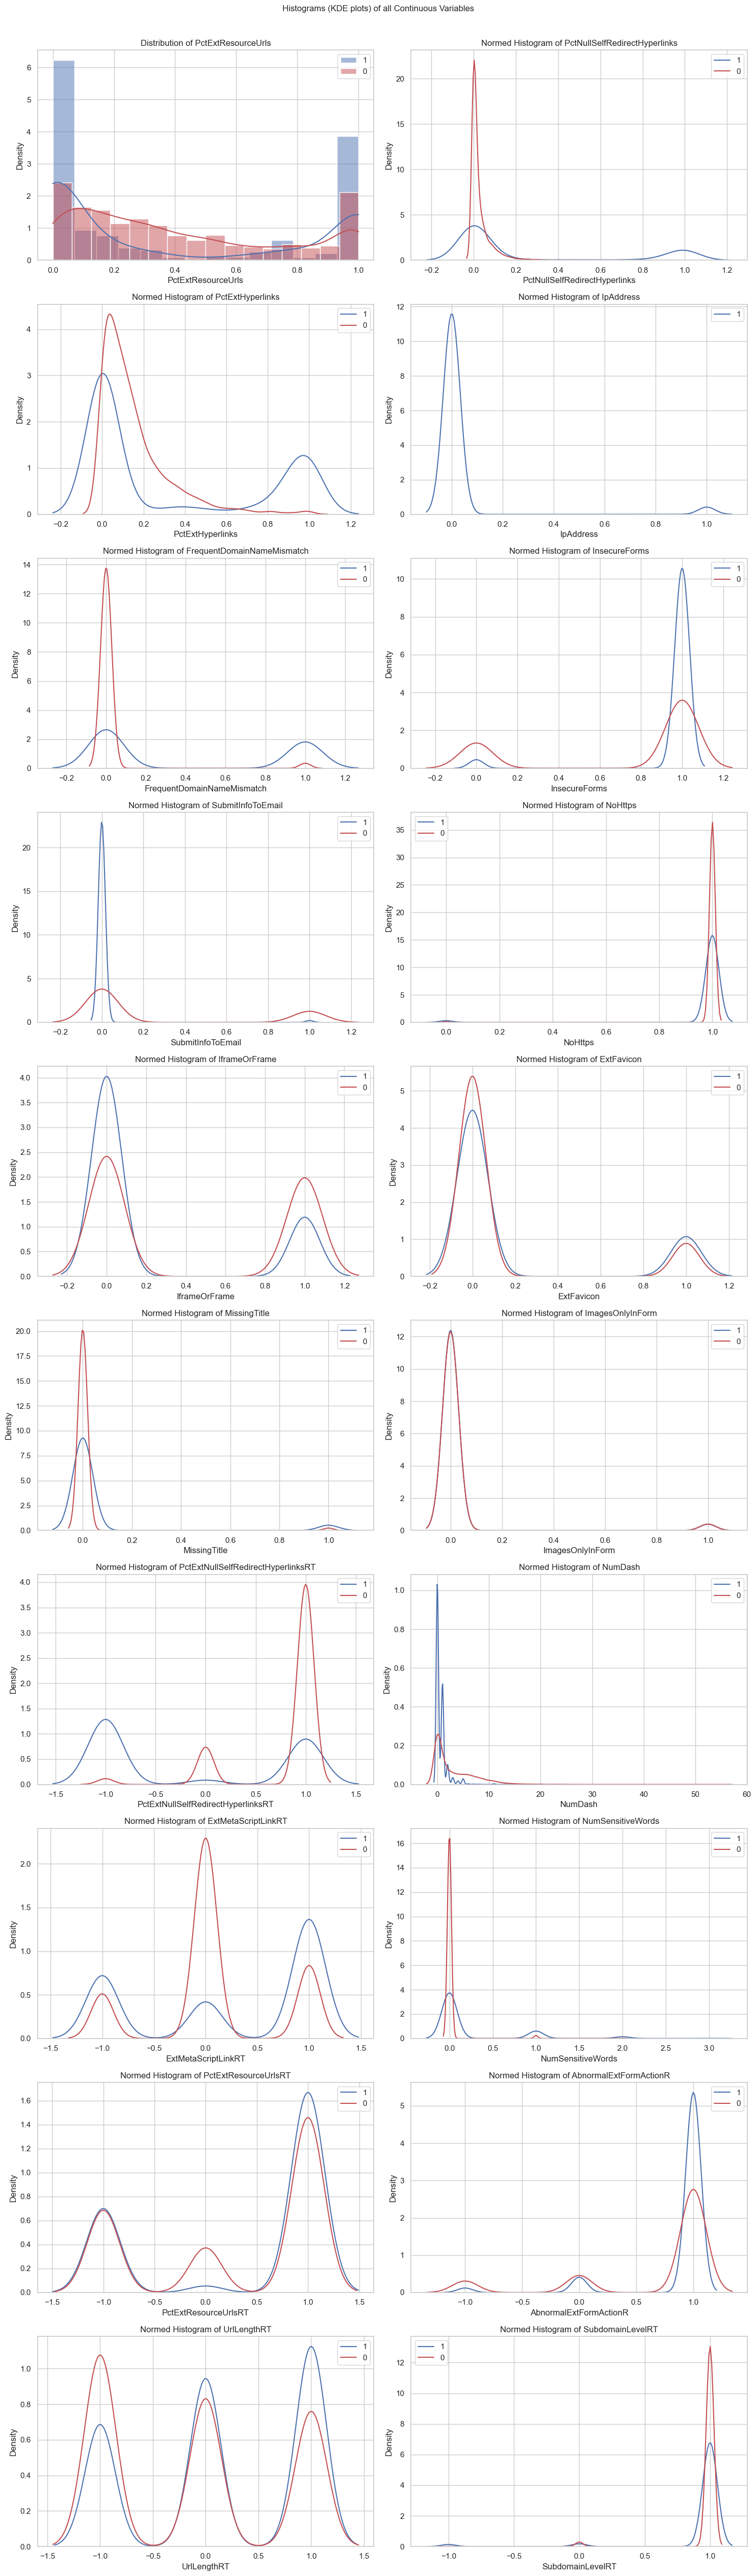

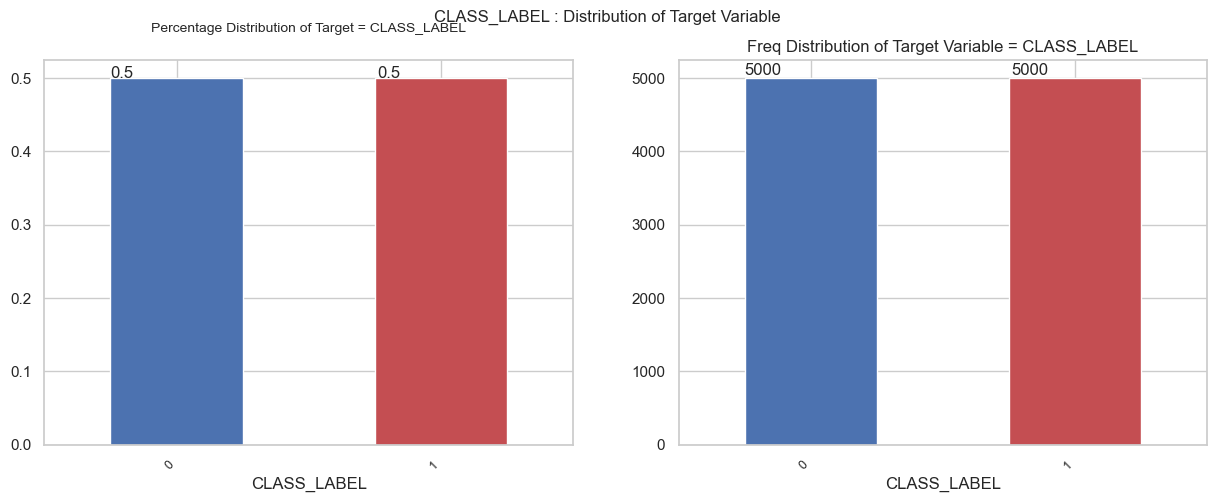

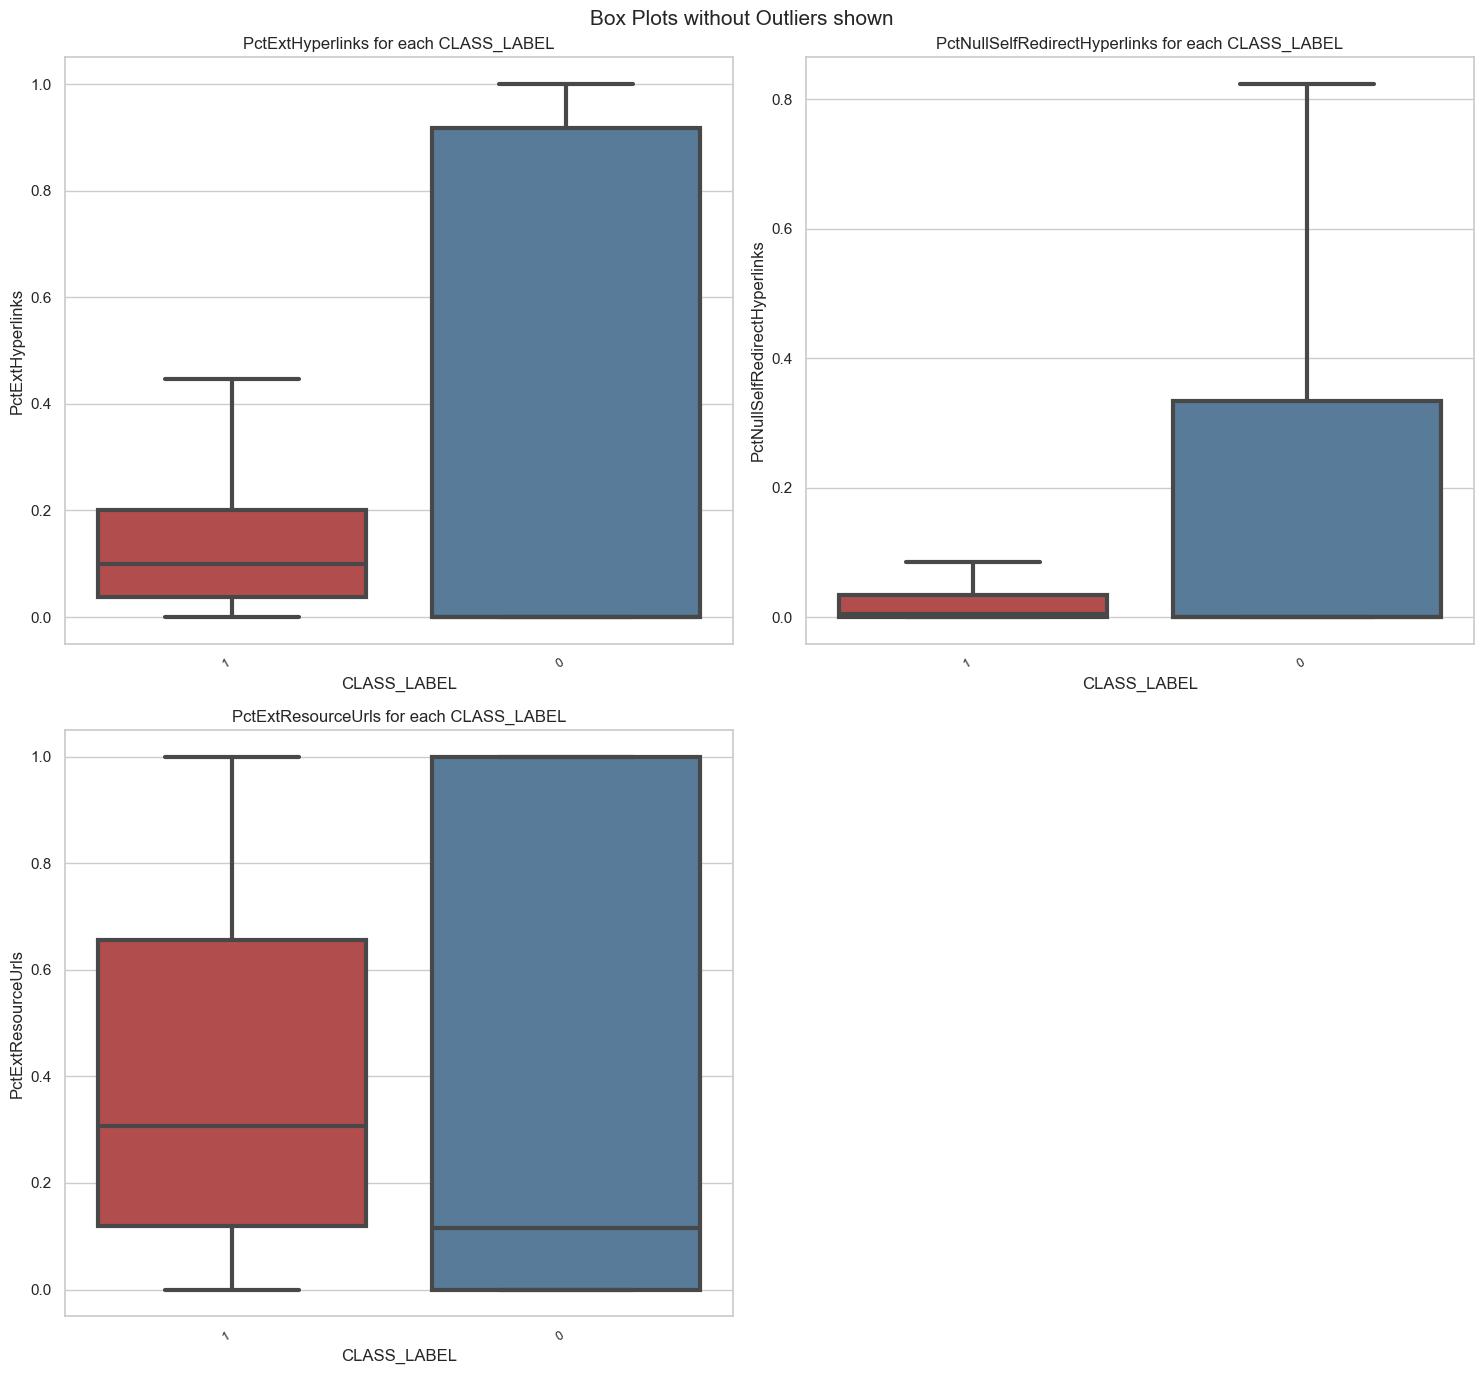

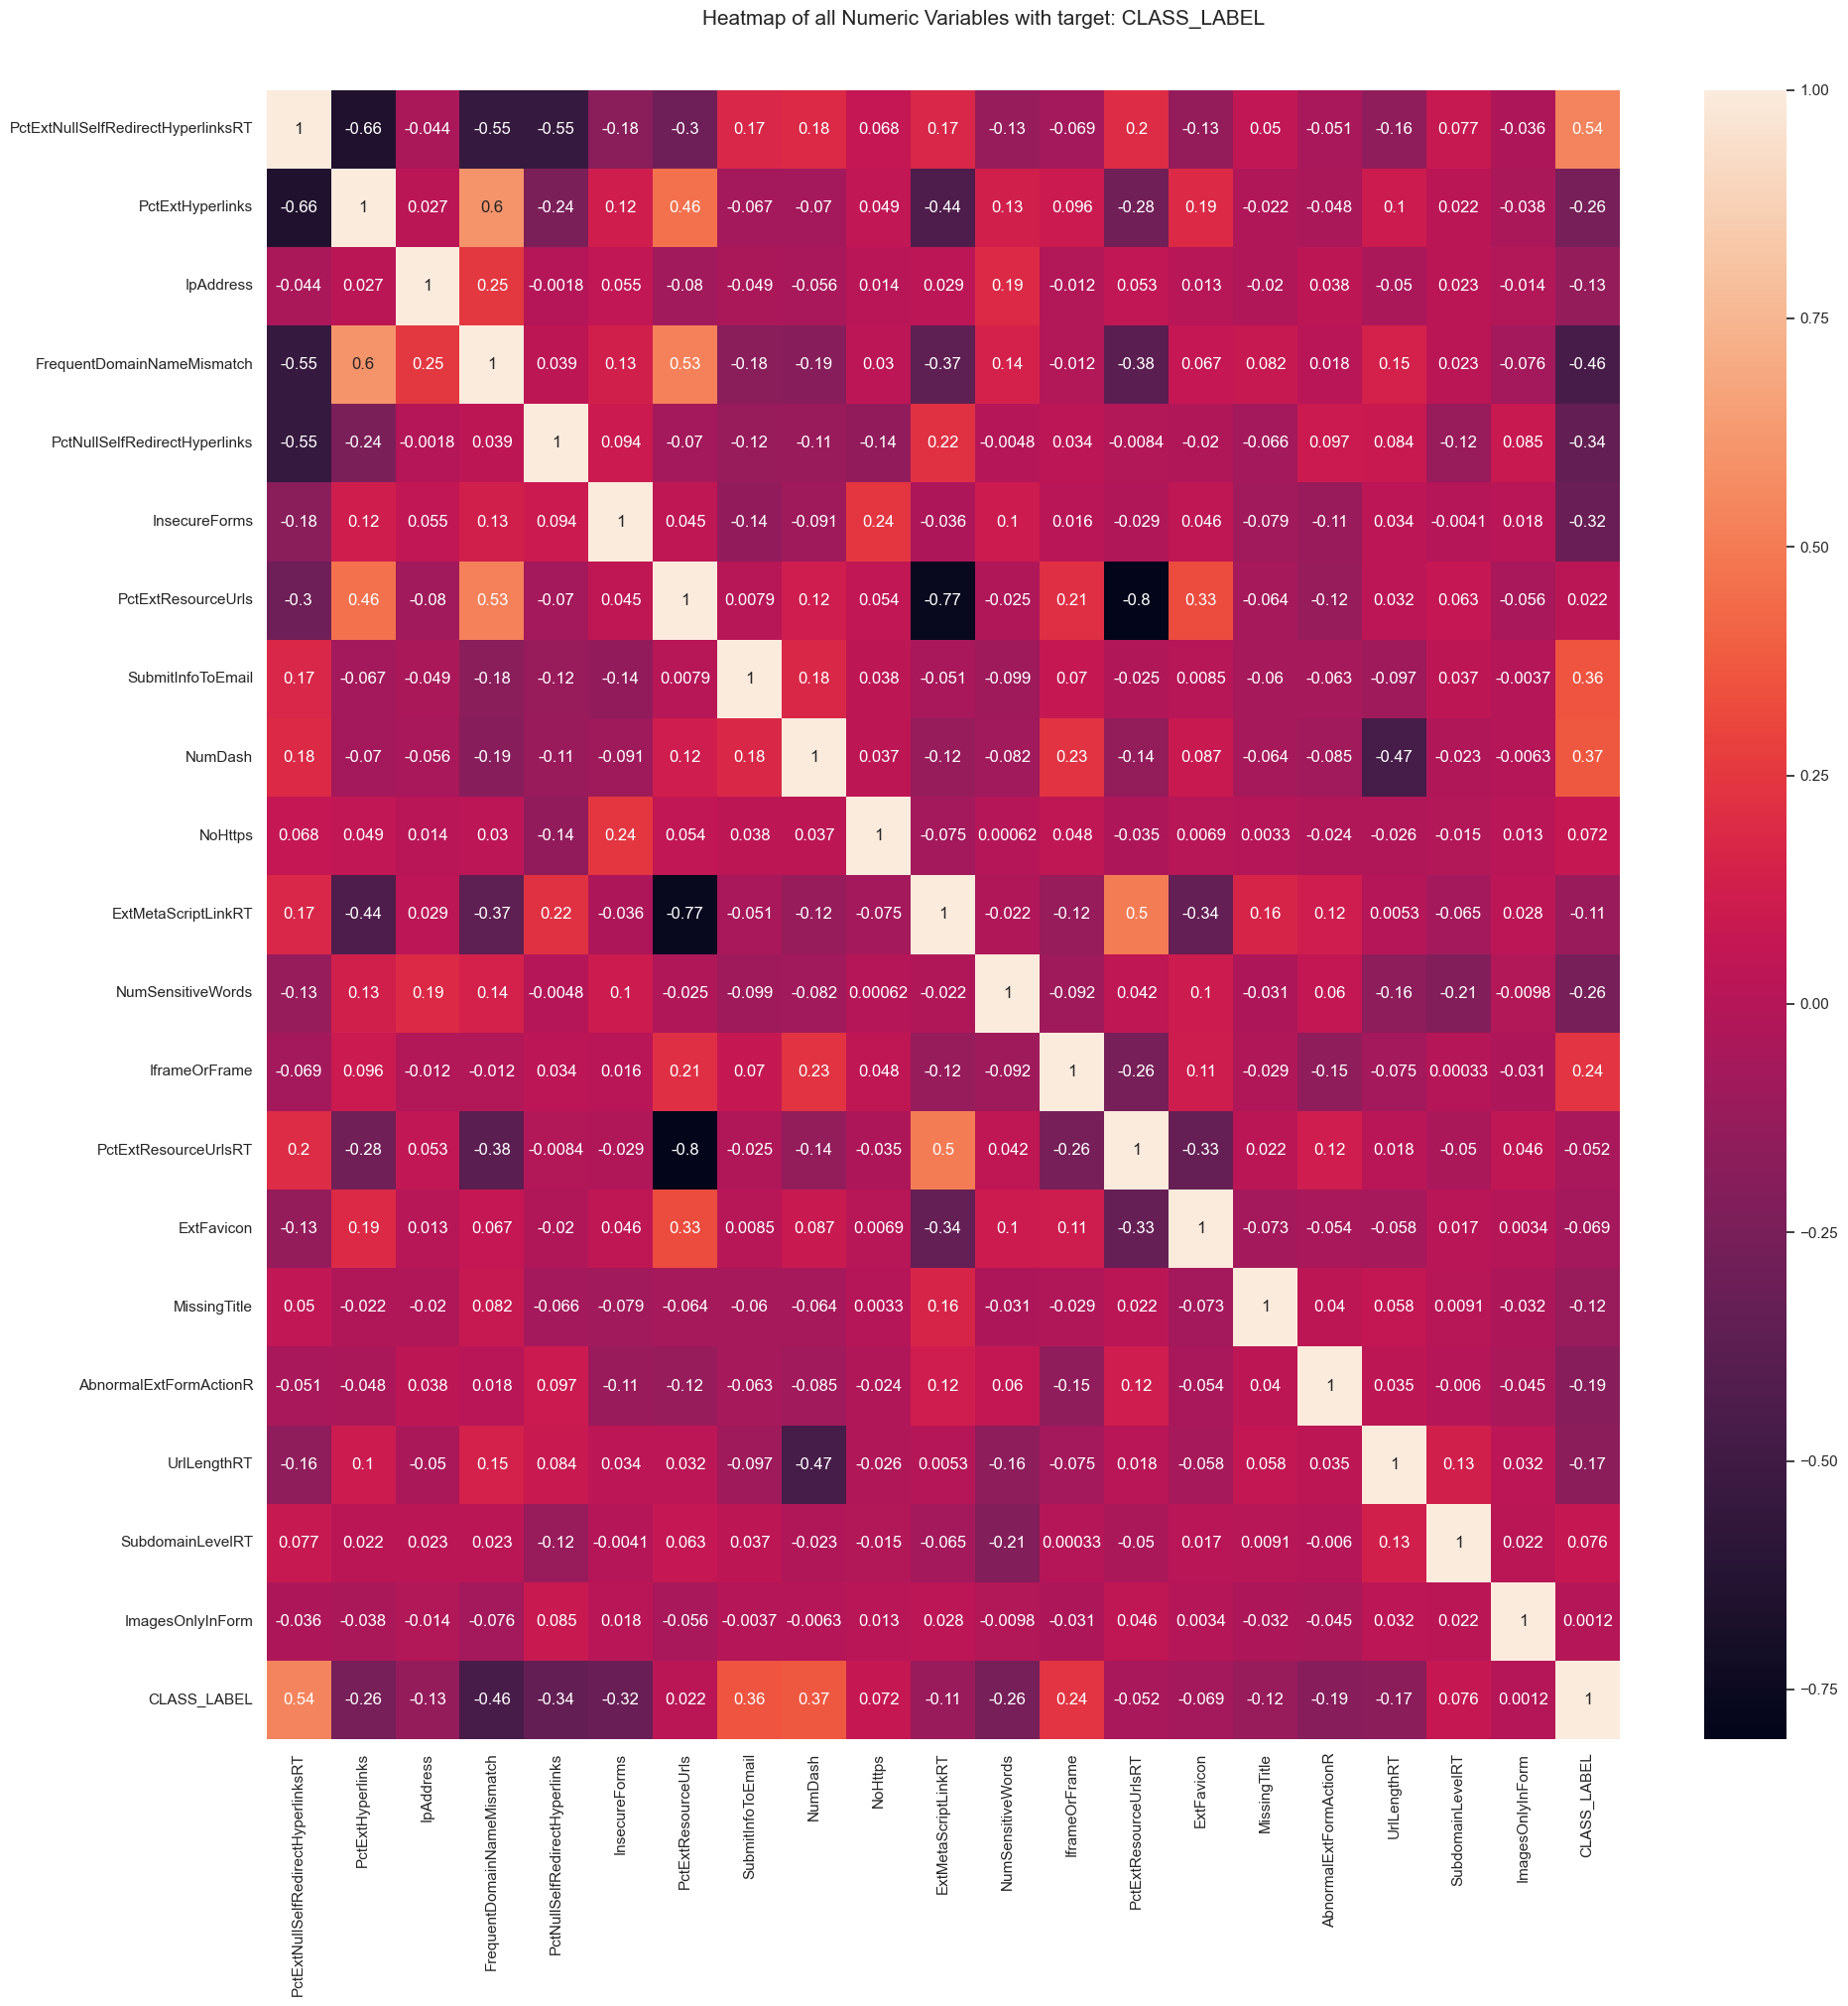

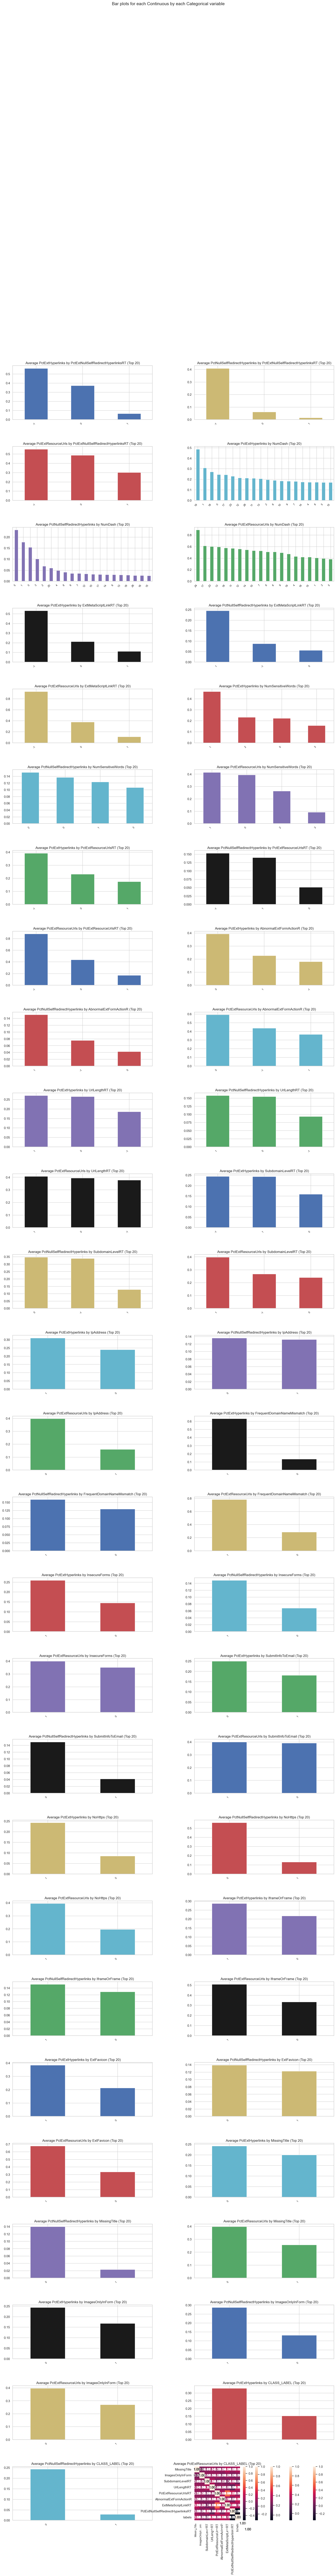

<Figure size 1200x1200 with 0 Axes>

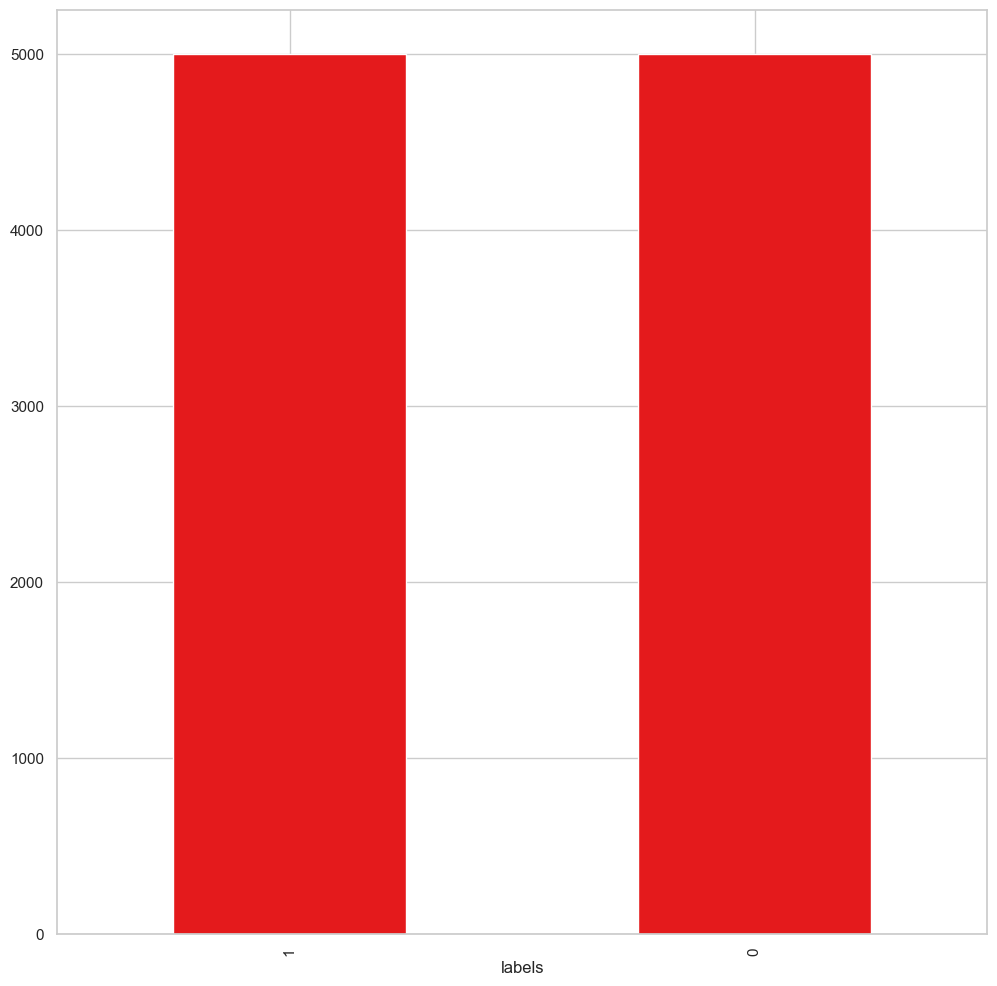

In [41]:
df['labels'].value_counts().plot(kind='bar')
plt.show()

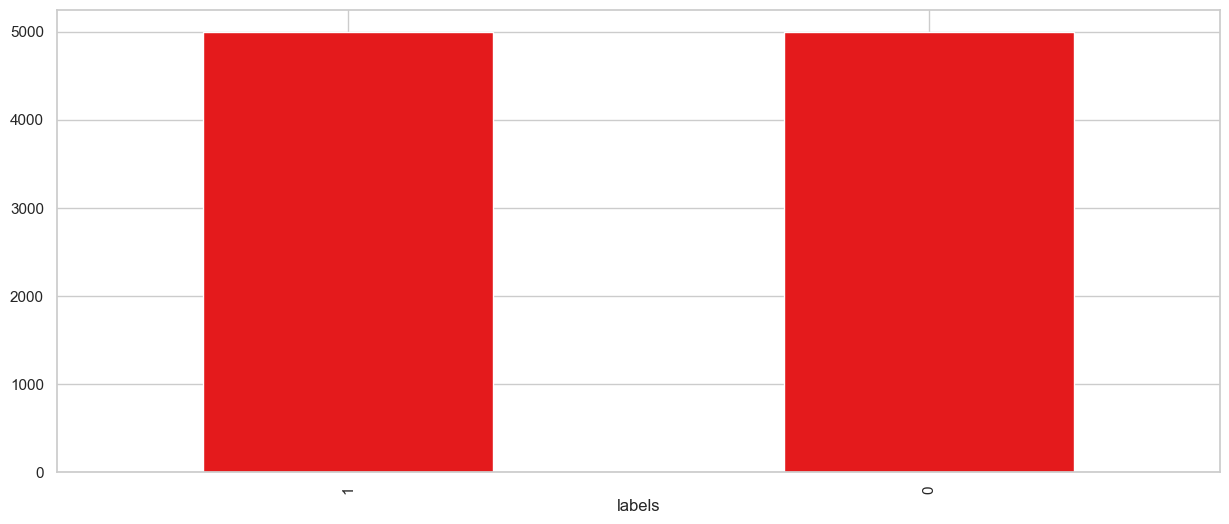

In [42]:
df['labels'].value_counts().plot(kind='bar')
plt.show()

In [43]:
def corr_heatmap(data, idx_s, idx_e):
    y=data['labels']
    temp=data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels']=y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

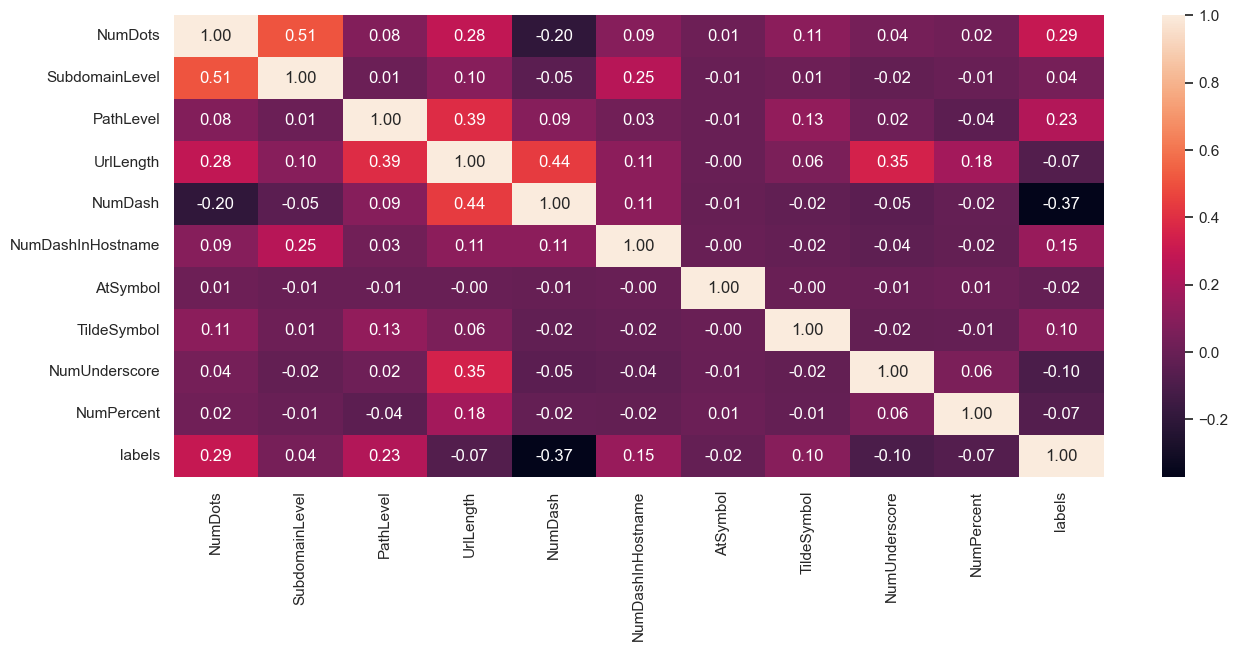

In [44]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize']=(15,6) # plt.rcParams keep the same figure size for the entire page
corr_heatmap(df, 0, 10)

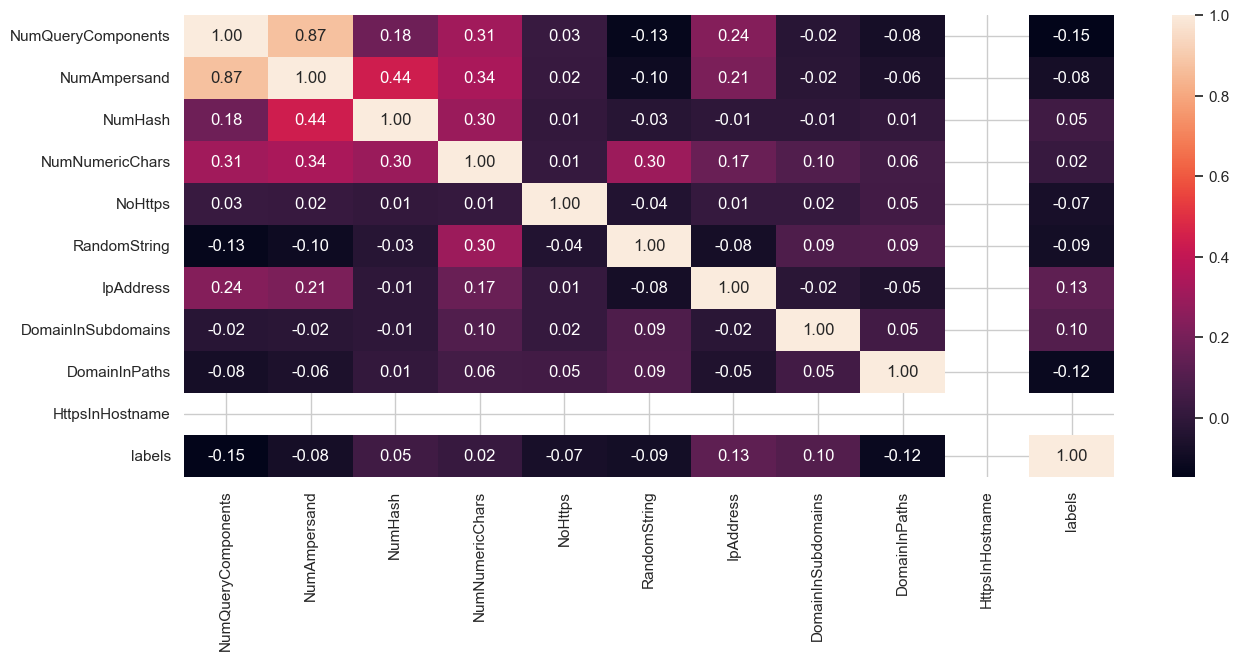

In [45]:
corr_heatmap(df, 10, 20)

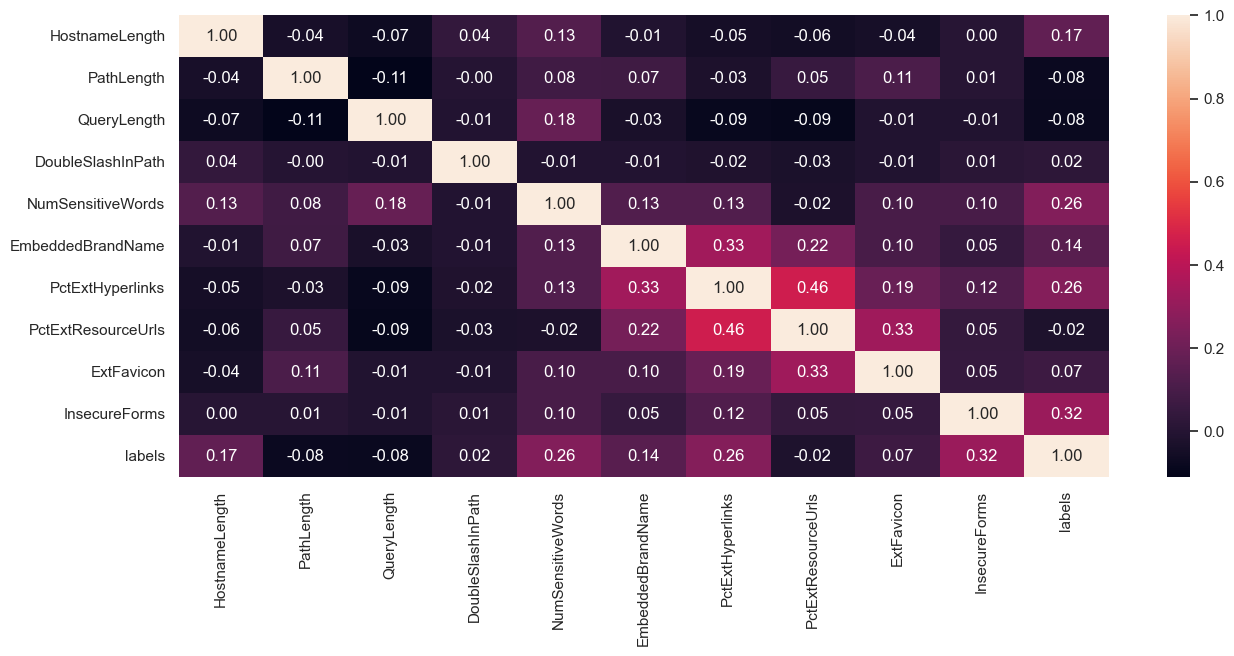

In [46]:
corr_heatmap(df, 20, 30)

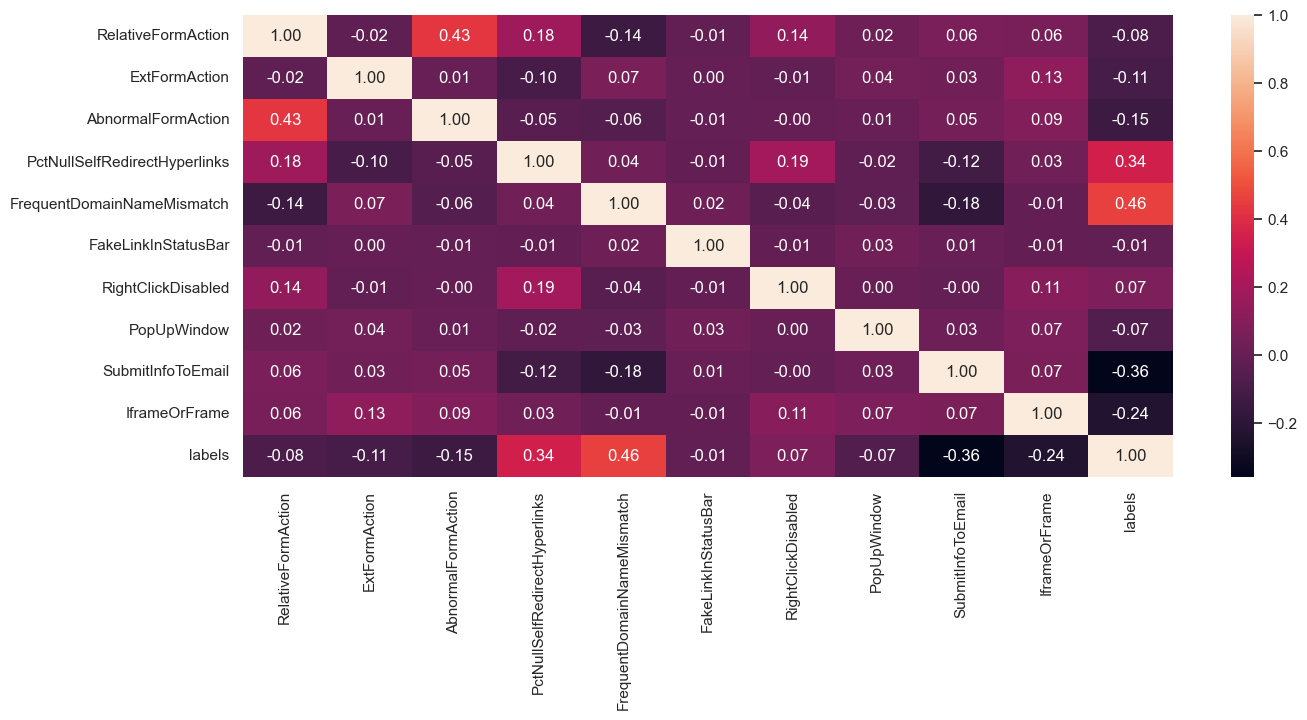

In [47]:
corr_heatmap(df, 30, 40)

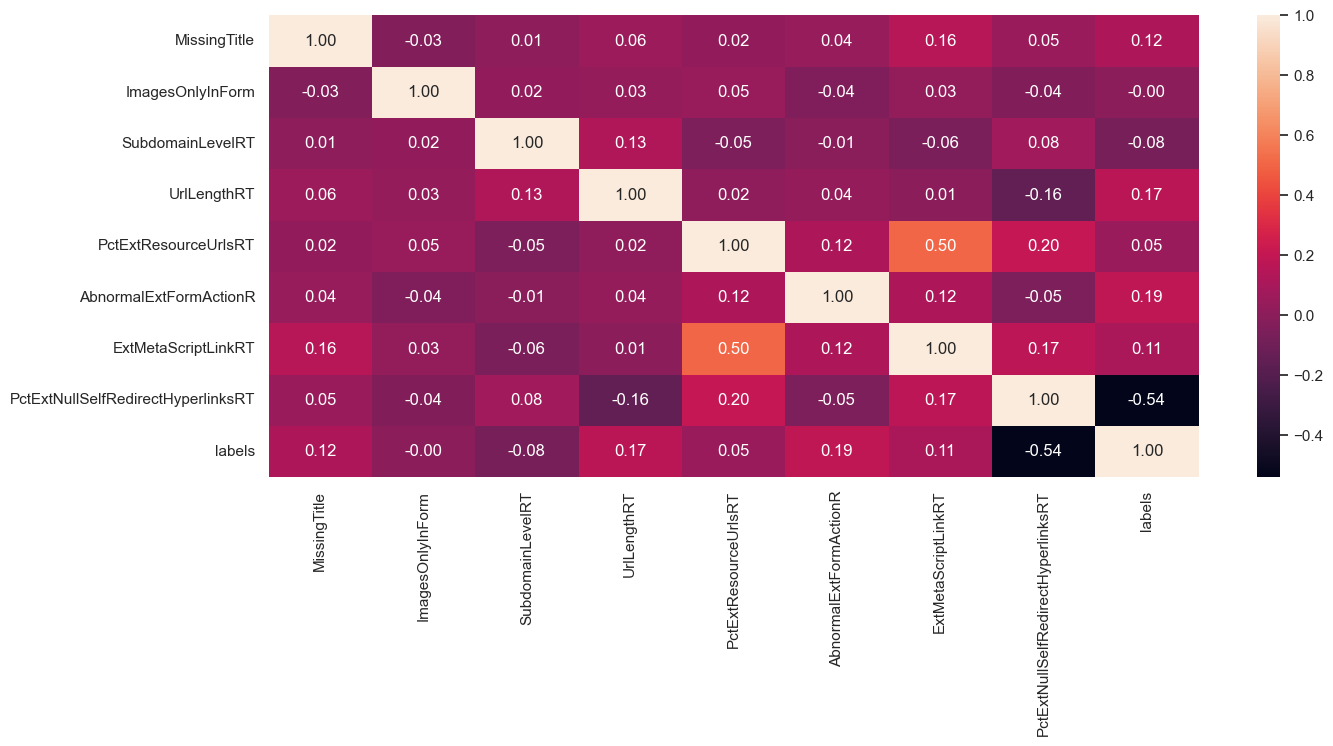

In [48]:
corr_heatmap(df, 40, 50)

scikit-learn library helps to identify the linear and non-linear relationship. It is best used mainly in the classification problem.

In [49]:
from sklearn.feature_selection import mutual_info_classif

X=df.drop('labels', axis=1)
y=df['labels']

# making the discrete features as integer type
discrete_features=X.dtypes==int

In [50]:
# Finding the classification score
mi_score=mutual_info_classif(X, y, discrete_features=discrete_features)
mi_score=pd.Series(mi_score, name="MI score", index=X.columns)
mi_score=mi_score.sort_values(ascending=False) # Sorting in descending order
mi_score

PctExtHyperlinks                      4.665765e-01
PctExtResourceUrls                    2.943557e-01
PctNullSelfRedirectHyperlinks         2.398197e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

In MI score, we prefer the high values. Because high values are contributing more towards the classification task whereas the lower ones are not contributing. So the specific MI threshold for feature selection depends on the nature of the problem that you are dealing with.

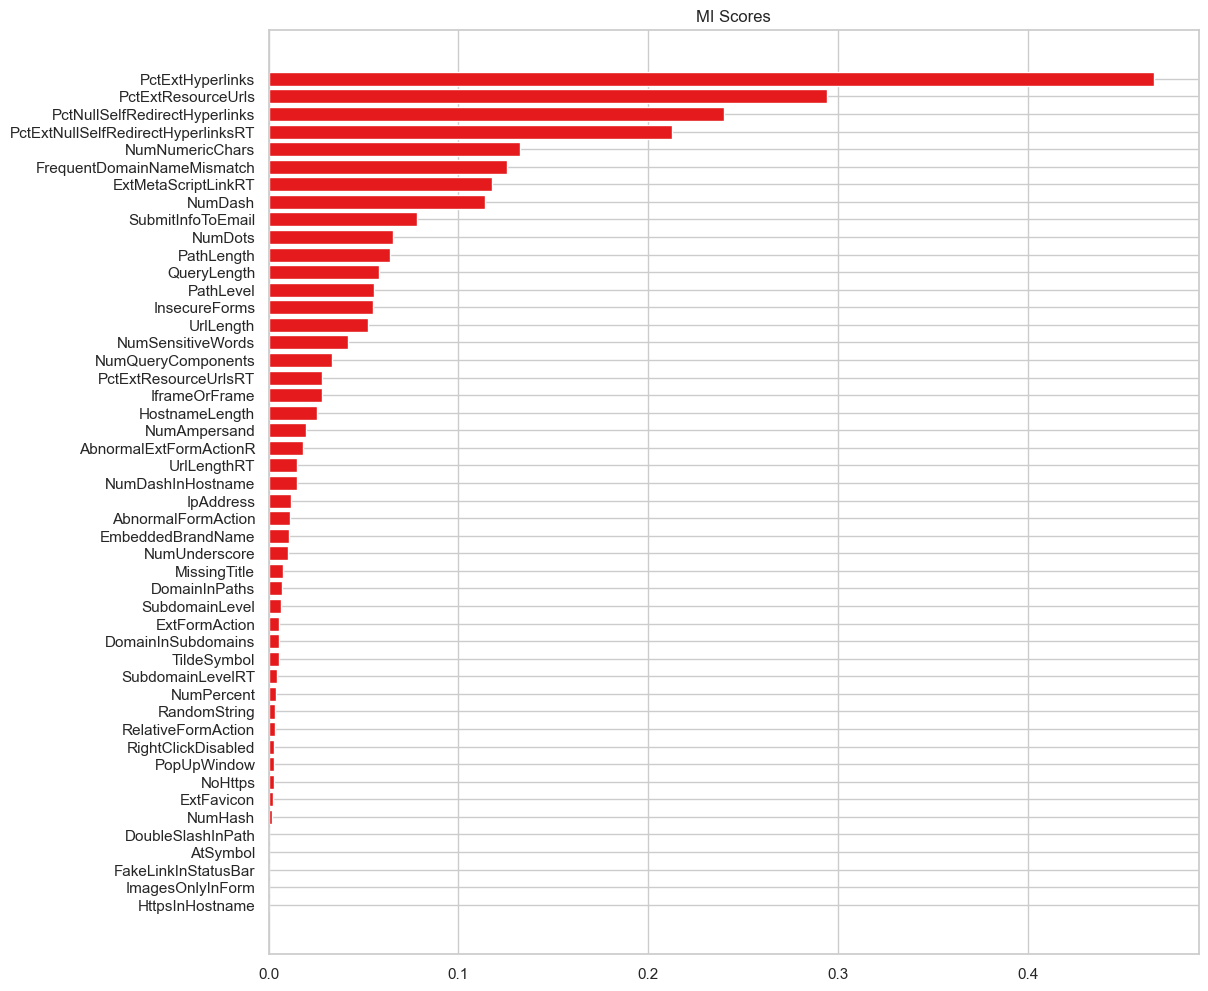

In [61]:
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending=True)
    width=np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")

plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_score)

In [58]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


cuml library accelerates the random forest upto 45x.
- !pip install cuml
- !git clone https://github.com/rapidsai/cuml.git

In [68]:
from sklearn.linear_model import LogisticRegression # One of the good model for binary classification problem
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Logistic Regression

In [70]:
def train_logistic(data, top_n):
    top_n_features=mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X=data[top_n_features]
    y=data['labels']
    
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, shuffle=True)
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred=lr.predict(X_test)
    
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    accuracy=accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

In [71]:
arr=[]
for i in range(20, 51):
    precision, recall, f1, accuracy=train_logistic(df, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.8968565815324165, recall : 0.9373716632443532, f1 score : 0.9166666666666666, accuracy : 0.917
Performance for Logistic Model with Top 21 features is precision : 0.8875855327468231, recall : 0.9312820512820513, f1 score : 0.9089089089089089, accuracy : 0.909
Performance for Logistic Model with Top 22 features is precision : 0.9109792284866469, recall : 0.9350253807106599, f1 score : 0.9228456913827655, accuracy : 0.923
Performance for Logistic Model with Top 23 features is precision : 0.9140096618357488, recall : 0.9422310756972112, f1 score : 0.9279058361942129, accuracy : 0.9265
Performance for Logistic Model with Top 24 features is precision : 0.9116781157998037, recall : 0.9336683417085427, f1 score : 0.9225422045680239, accuracy : 0.922
Performance for Logistic Model with Top 25 features is precision : 0.9063097514340345, recall : 0.9404761904761905, f1 score : 0.923076923076923, accuracy : 0.921
Performance for 

In [73]:
df_log=pd.DataFrame(arr, columns=['Number of feature', 'precision', 'recall', 'f1-score', 'accuracy'])
df_log

Number of feature  precision   recall   f1-score  accuracy
0          20          0.896857   0.937372  0.916667   0.9170 
1          21          0.887586   0.931282  0.908909   0.9090 
2          22          0.910979   0.935025  0.922846   0.9230 
3          23          0.914010   0.942231  0.927906   0.9265 
4          24          0.911678   0.933668  0.922542   0.9220 
5          25          0.906310   0.940476  0.923077   0.9210 
6          26          0.904040   0.922680  0.913265   0.9150 
7          27          0.918065   0.934673  0.926295   0.9260 
8          28          0.917566   0.940644  0.928962   0.9285 
9          29          0.918627   0.938878  0.928642   0.9280 
10         30          0.906339   0.928295  0.917185   0.9135 
11         31          0.911881   0.931244  0.921461   0.9215 
12         32          0.912563   0.938987  0.925586   0.9270 
13         33          0.919162   0.934077  0.926559   0.9270 
14         34          0.913260   0.928065  0.920603   0.9210 
15         35          0.933876   0.954262  0.943959   0.9455 
16         36          0.925819   0.931202  0.928502   0.9260 
17         37          0.941118   0.930898  0.935980   0.9355 
18         38          0.906250   0.922465  0.914286   0.9130 
19         39          0.920976   0.946841  0.933729   0.9330 
20         40          0.925816   0.942598  0.934132   0.9340 
21         41          0.932220   0.938675  0.935436   0.9345 
22         42          0.923301   0.945328  0.934185   0.9330 
23         43          0.922852   0.952621  0.937500   0.9370 
24         44          0.912210   0.955603  0.933402   0.9355 
25         45          0.926174   0.938776  0.932432   0.9300 
26         46          0.936735   0.941538  0.939130   0.9405 
27         47          0.934760   0.943416  0.939068   0.9405 
28         48          0.933925   0.952716  0.943227   0.9430 
29         49          0.925170   0.937931  0.931507   0.9300 
30         50          0.929254   0.938224  0.933718   0.9310

<Axes: xlabel='Number of feature', ylabel='precision'>

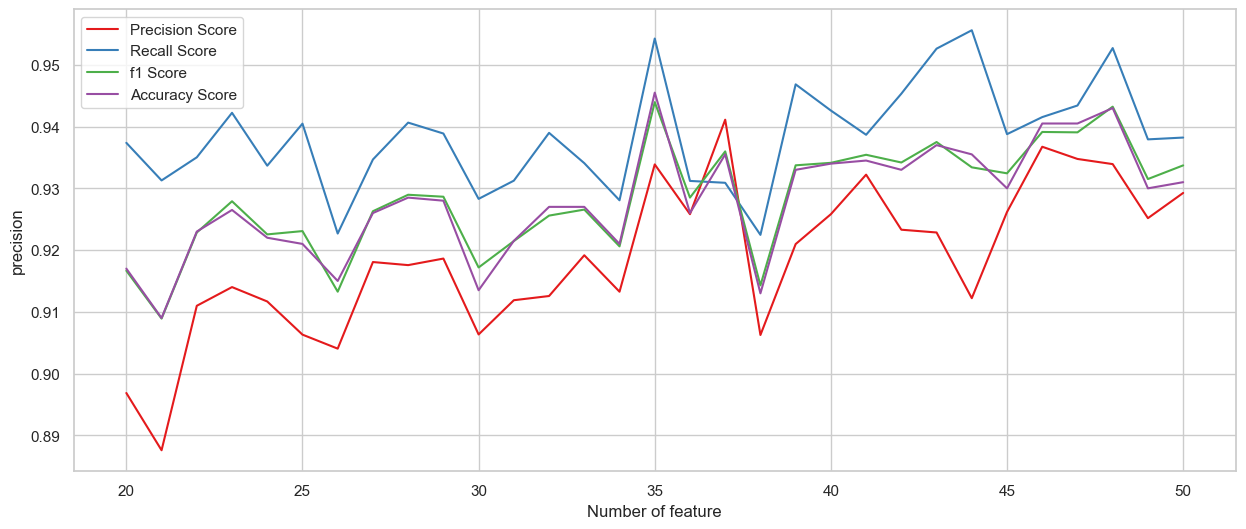

In [74]:
sns.lineplot(x='Number of feature', y='precision', data=df_log, label='Precision Score')
sns.lineplot(x='Number of feature', y='recall', data=df_log, label='Recall Score')
sns.lineplot(x='Number of feature', y='f1-score', data=df_log, label='f1 Score')
sns.lineplot(x='Number of feature', y='accuracy', data=df_log, label='Accuracy Score')

### Random Forest Classifier

In [75]:
def train_rfc(data, top_n):
    top_n_features=mi_score.sort_values(ascending=False).head(top_n).index.tolist()
    X=data[top_n_features]
    y=data['labels']
    
    X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, shuffle=True)
    rfc=RandomForestClassifier(n_estimators=500,
                              criterion='entropy',
                              max_depth=32,
                              max_features=1.0)
    rfc.fit(X_train, y_train)
    y_pred=rfc.predict(X_test)
    
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    accuracy=accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

In [76]:
arr1=[]
for i in range(20, 51):
    precision, recall, f1, accuracy=train_rfc(df, i)
    print("Performance for RandomForestClassifier Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr1.append([i, precision, recall, f1, accuracy])

Performance for RandomForestClassifier Model with Top 20 features is precision : 0.9702380952380952, recall : 0.9809428284854563, f1 score : 0.9755610972568578, accuracy : 0.9755
Performance for RandomForestClassifier Model with Top 21 features is precision : 0.9752229930624381, recall : 0.9752229930624381, f1 score : 0.9752229930624381, accuracy : 0.975
Performance for RandomForestClassifier Model with Top 22 features is precision : 0.9812623274161736, recall : 0.9861248761149654, f1 score : 0.9836875926841324, accuracy : 0.9835
Performance for RandomForestClassifier Model with Top 23 features is precision : 0.9782178217821782, recall : 0.9821073558648111, f1 score : 0.9801587301587302, accuracy : 0.98
Performance for RandomForestClassifier Model with Top 24 features is precision : 0.9774066797642437, recall : 0.9783677482792527, f1 score : 0.9778869778869779, accuracy : 0.9775
Performance for RandomForestClassifier Model with Top 25 features is precision : 0.9777553083923155, recall 

In [77]:
df_rfc=pd.DataFrame(arr1, columns=['Number of feature', 'precisions', 'recall', 'f1-score', 'accuracy'])
df_rfc

Number of feature  precisions   recall   f1-score  accuracy
0          20           0.970238   0.980943  0.975561   0.9755 
1          21           0.975223   0.975223  0.975223   0.9750 
2          22           0.981262   0.986125  0.983688   0.9835 
3          23           0.978218   0.982107  0.980159   0.9800 
4          24           0.977407   0.978368  0.977887   0.9775 
5          25           0.977755   0.973817  0.975782   0.9760 
6          26           0.977046   0.984909  0.980962   0.9810 
7          27           0.976744   0.985714  0.981209   0.9815 
8          28           0.976884   0.979839  0.978359   0.9785 
9          29           0.976355   0.977318  0.976836   0.9765 
10         30           0.973214   0.977092  0.975149   0.9750 
11         31           0.973948   0.977867  0.975904   0.9760 
12         32           0.979392   0.978431  0.978911   0.9785 
13         33           0.973764   0.983690  0.978702   0.9790 
14         34           0.973346   0.980119  0.976721   0.9765 
15         35           0.969903   0.973684  0.971790   0.9710 
16         36           0.972000   0.981818  0.976884   0.9770 
17         37           0.981038   0.977137  0.979084   0.9790 
18         38           0.976143   0.982000  0.979063   0.9790 
19         39           0.977092   0.981000  0.979042   0.9790 
20         40           0.978088   0.977114  0.977601   0.9775 
21         41           0.983573   0.978550  0.981055   0.9815 
22         42           0.982125   0.981151  0.981638   0.9815 
23         43           0.976048   0.978000  0.977023   0.9770 
24         44           0.979571   0.982582  0.981074   0.9815 
25         45           0.973477   0.980218  0.976836   0.9765 
26         46           0.977823   0.979798  0.978809   0.9790 
27         47           0.980905   0.978937  0.979920   0.9800 
28         48           0.978516   0.979472  0.978994   0.9785 
29         49           0.974181   0.984940  0.979531   0.9795 
30         50           0.984925   0.975124  0.980000   0.9800

<Axes: xlabel='Number of feature', ylabel='precisions'>

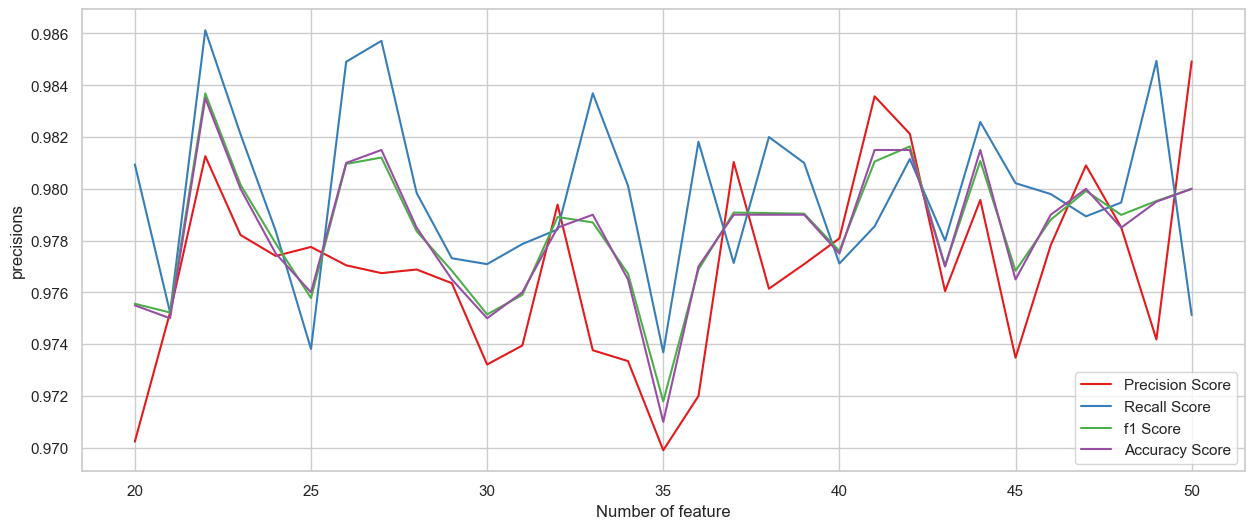

In [78]:
sns.lineplot(x='Number of feature', y='precisions', data=df_rfc, label='Precision Score')
sns.lineplot(x='Number of feature', y='recall', data=df_rfc, label='Recall Score')
sns.lineplot(x='Number of feature', y='f1-score', data=df_rfc, label='f1 Score')
sns.lineplot(x='Number of feature', y='accuracy', data=df_rfc, label='Accuracy Score')

In [82]:
top_n_features=mi_score.sort_values(ascending=False).head(42).index.tolist()
X=df[top_n_features]
y=df['labels']
    
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, shuffle=True)
rfc=RandomForestClassifier(n_estimators=500,
                           criterion='entropy',
                           max_depth=32,
                           max_features=1.0)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
    
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)

In [83]:
print("Performance for RandomForestClassifier Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(42, precision, recall, f1, accuracy))

Performance for RandomForestClassifier Model with Top 42 features is precision : 0.9787018255578094, recall : 0.9806910569105691, f1 score : 0.9796954314720812, accuracy : 0.98


In [84]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1016
           1       0.98      0.98      0.98       984

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

[[995  21]
 [ 19 965]]
